In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = {"Mesh size" : [0, 45, 63, 90, 125, 180, 250, 355, 500, 710, 1000, 1400, 1800],
       "Mass retained" : [1.1, 1.9, 5.25, 7.5, 21.8, 37.5, 37.5, 97, 90, 112.5, 285, 52.5, np.nan]}

df = pd.DataFrame(data)
df

,Mesh size,Mass retained
0,0,1.10
1,45,1.90
2,63,5.25
3,90,7.50
4,125,21.80
5,180,37.50
6,250,37.50
7,355,97.00
8,500,90.00
9,710,112.50


In [5]:
# Step 1: Define the function for mass fractions
def mass_fraction(mass):
    '''This function requires the column of mass retained from the data frame to be parsed in.
    It will then compute the mass fractions.
    '''
    mass_frac = (mass / mass.sum()).round(3)
    return mass_frac

In [6]:
# Step 2: Define the function for the width i.e size of intervals
def class_width(mesh):
    ''' The column of mesh sizes from the data can be parsed into this function as the arguement.
    The function then uses the mesh sizes to compute the width.
    '''
    widths = mesh.diff()
    return widths

In [7]:
# Step 3: Compute the mass fractions and the class widths by calling the respective functions
df2 = df.copy()
df2['Mass fraction'] = mass_fraction(df2['Mass retained'])          
df2['Class width'] = class_width(df2['Mesh size']).shift(-1)    

#Step 4: Compute the quantity distribution function for the histogram
df2['qr'] = df2['Mass fraction'] / df2['Class width']          
df2

,Mesh size,Mass retained,Mass fraction,Class width,qr
0,0,1.10,0.001,45.0,0.000022
1,45,1.90,0.003,18.0,0.000167
2,63,5.25,0.007,27.0,0.000259
3,90,7.50,0.010,35.0,0.000286
4,125,21.80,0.029,55.0,0.000527
5,180,37.50,0.050,70.0,0.000714
6,250,37.50,0.050,105.0,0.000476
7,355,97.00,0.129,145.0,0.000890
8,500,90.00,0.120,210.0,0.000571
9,710,112.50,0.150,290.0,0.000517


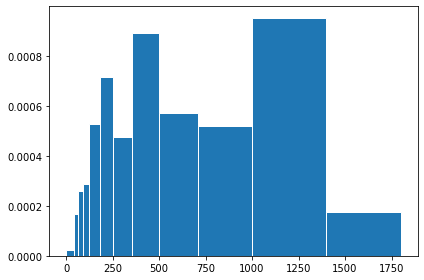

In [8]:
fig, ax = plt.subplots()
ax.bar(df2['Mesh size'], df2['qr'], width=df2['Class width'], align='edge', edgecolor='white')
plt.tight_layout()


In [9]:
# Step 1: Define the function to calculate Dmean
def mean_size(mesh):
    ''' This function requires the mesh sizes to be parsed in and then 
    it calculates the mean between intervals of each sizes. 
    '''
    Dmean = mesh.rolling(2).mean().shift(-1)
    return Dmean

In [10]:
# Step 2: Compute the mass fractions, class sizes and the means.
df4 = df.copy()
df4['Mass fraction'] = mass_fraction(df4['Mass retained'])         
df4['Class width'] = class_width(df4['Mesh size']).shift(-1)   
df4['Dmean'] = mean_size(df4['Mesh size'])                     
df4['qr_prob'] = df4['Mass fraction'] / df4['Class width']         
df4

,Mesh size,Mass retained,Mass fraction,Class width,Dmean,qr_prob
0,0,1.10,0.001,45.0,22.5,0.000022
1,45,1.90,0.003,18.0,54.0,0.000167
2,63,5.25,0.007,27.0,76.5,0.000259
3,90,7.50,0.010,35.0,107.5,0.000286
4,125,21.80,0.029,55.0,152.5,0.000527
5,180,37.50,0.050,70.0,215.0,0.000714
6,250,37.50,0.050,105.0,302.5,0.000476
7,355,97.00,0.129,145.0,427.5,0.000890
8,500,90.00,0.120,210.0,605.0,0.000571
9,710,112.50,0.150,290.0,855.0,0.000517


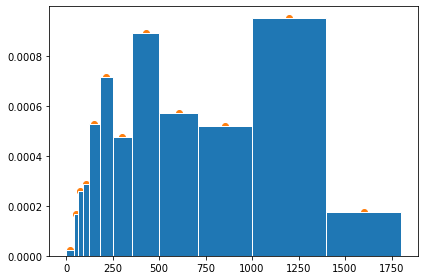

In [18]:
#Generate the plot  
fig, ax = plt.subplots()
ax.bar(df2['Mesh size'], df2['qr'], width=df2['Class width'], align='edge', edgecolor='white')
ax.scatter(df4['Dmean'], df4['qr_prob'])
plt.tight_layout()

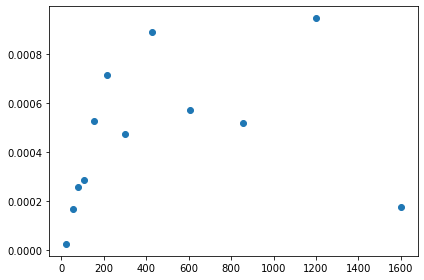

In [12]:
fig, ax = plt.subplots()
ax.scatter(df4['Dmean'], df4['qr_prob'])
plt.tight_layout()

In [13]:
y = df4['qr_prob']

In [14]:
y

0     0.000022
1     0.000167
2     0.000259
3     0.000286
4     0.000527
5     0.000714
6     0.000476
7     0.000890
8     0.000571
9     0.000517
10    0.000950
11    0.000175
12         NaN
Name: qr_prob, dtype: float64

In [15]:
y_axis = y*1e4

In [17]:
y_axis

0     0.222222
1     1.666667
2     2.592593
3     2.857143
4     5.272727
5     7.142857
6     4.761905
7     8.896552
8     5.714286
9     5.172414
10    9.500000
11    1.750000
12         NaN
Name: qr_prob, dtype: float64

In [16]:
x_axis = df4['Dmean']

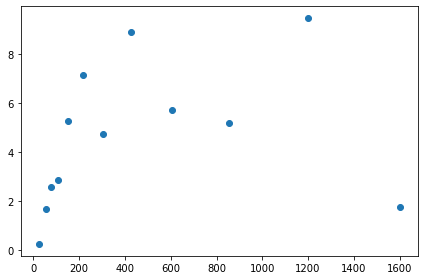

In [ ]:
plt.scatter(x_axis, y_axis)
plt.tight_layout()